<a href="https://colab.research.google.com/github/Shikha18Shukla/Machine_Learning_repo/blob/main/lab4_ml_L1%2CL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment 4 : Apply Ridge and Lasso on Boston Housing dataset. Compare regression coefficients, MSE, and regularization effects.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error



In [ ]:
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target
X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [ ]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [ ]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
15362,4.6050,16.0,7.002212,1.066372,1351.0,2.988938,33.36,-117.22
16623,2.7266,28.0,6.131915,1.256738,1650.0,2.340426,35.36,-120.83
18086,9.2298,25.0,7.237676,0.947183,1585.0,2.790493,37.31,-122.05
2144,2.7850,36.0,5.289030,0.983122,1227.0,2.588608,36.77,-119.76


In [ ]:
y_test

,MedHouseVal
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
15362,2.63300
16623,2.66800
18086,5.00001
2144,0.72300


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge MSE: {mse_ridge:.3f}")


Ridge MSE: 0.556


In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso MSE: {mse_lasso:.3f}")


Lasso MSE: 0.548


In [ ]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Ridge Coef': ridge.coef_,
    'Lasso Coef': lasso.coef_
})

coeff_df


,Feature,Ridge Coef,Lasso Coef
0,MedInc,0.854327,0.800957
1,HouseAge,0.122624,0.127087
2,AveRooms,-0.294210,-0.162759
3,AveBedrms,0.339008,0.206207
4,Population,-0.002282,-0.000000
5,AveOccup,-0.040833,-0.030602
6,Latitude,-0.896168,-0.790113
7,Longitude,-0.869071,-0.755674


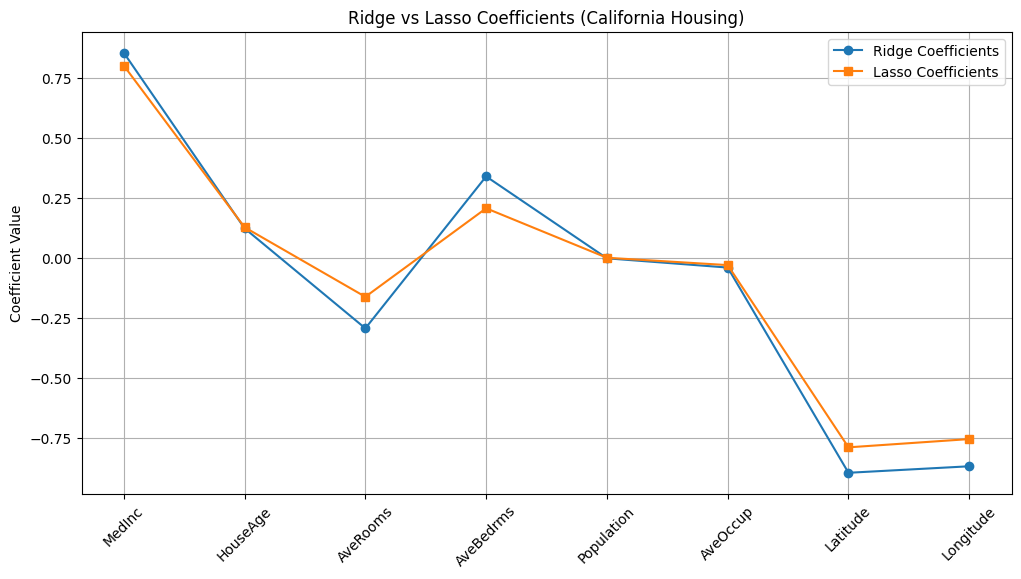

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(ridge.coef_, 'o-', label='Ridge Coefficients')
plt.plot(lasso.coef_, 's-', label='Lasso Coefficients')
plt.xticks(range(len(X.columns)), X.columns, rotation=45)
plt.ylabel("Coefficient Value")
plt.title("Ridge vs Lasso Coefficients (California Housing)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
alphas = np.logspace(-3, 3, 50)
ridge_coefs = []
lasso_coefs = []


In [ ]:
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    ridge_coefs.append(ridge.coef_)

    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    lasso_coefs.append(lasso.coef_)


In [ ]:
ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)


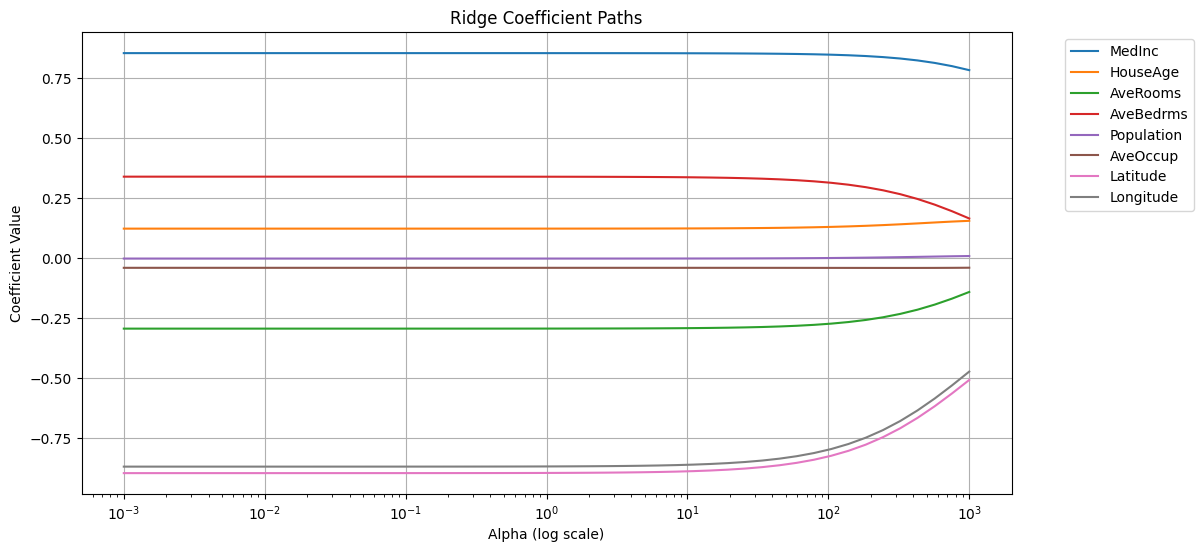

In [ ]:
plt.figure(figsize=(12,6))
for i in range(ridge_coefs.shape[1]):
    plt.plot(alphas, ridge_coefs[:, i], label=X.columns[i])
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coefficient Value")
plt.title("Ridge Coefficient Paths")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


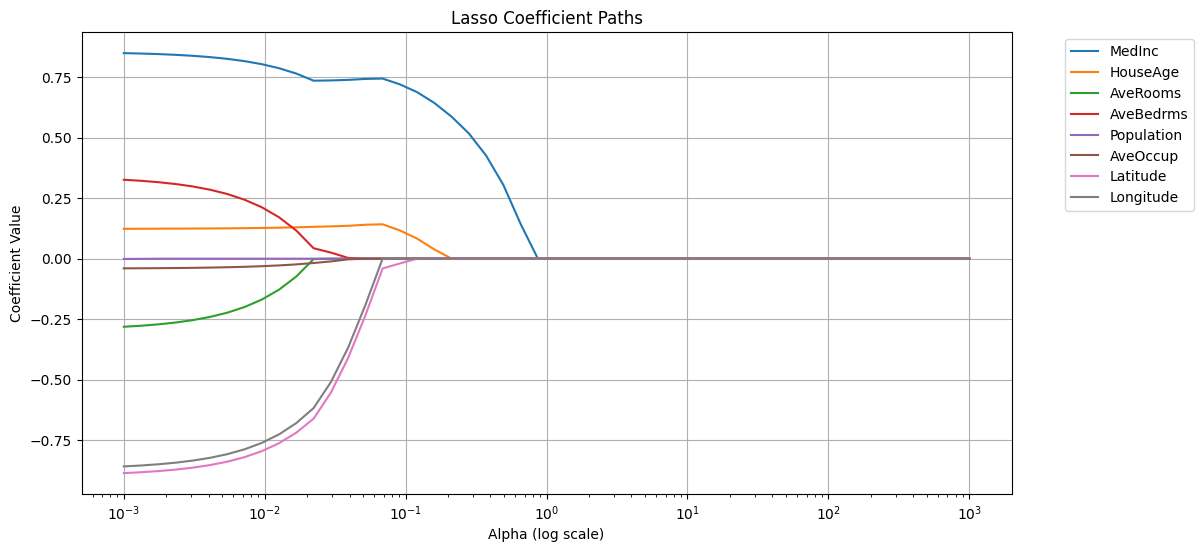

In [ ]:
plt.figure(figsize=(12,6))
for i in range(lasso_coefs.shape[1]):
    plt.plot(alphas, lasso_coefs[:, i], label=X.columns[i])
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coefficient Value")
plt.title("Lasso Coefficient Paths")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
